In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("YlGnBu")

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
# train set

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# test set

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# sample submission

df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Exploratory Data Analysis

In [6]:
# train data

train_columns = []

train_columns.extend(df_train.columns)

print(f'Loaded train dataset with shape {df_train.shape} ({df_train.shape[0]} rows and {df_train.shape[1]} columns) and column names: \n{train_columns}')

test_columns = []

test_columns.extend(df_test.columns)

print(f'\nLoaded test dataset with shape {df_test.shape} ({df_test.shape[0]} rows and {df_test.shape[1]} columns) and column names: \n{test_columns}')

gender_submission_columns = []

gender_submission_columns.extend(df_gender_submission.columns)

print(f'\nLoaded sample submission dataset with shape {df_gender_submission.shape} ({df_gender_submission.shape[0]} rows and {df_gender_submission.shape[1]} columns) and column names: \n{gender_submission_columns}')

Loaded train dataset with shape (891, 12) (891 rows and 12 columns) and column names: 
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Loaded test dataset with shape (418, 11) (418 rows and 11 columns) and column names: 
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Loaded sample submission dataset with shape (418, 2) (418 rows and 2 columns) and column names: 
['PassengerId', 'Survived']


## Train dataset

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering

In [8]:
# Change Pclass to upper, middle and lower

pclass_dict = {
    1 : 'Upper', 
    2 : 'Middle', 
    3 : 'Lower'
}

df_train = df_train.replace({
    "Pclass": pclass_dict
})

## Survival ratio

There were 342 survivors and 549 mortalities in the train set.
Making the chance of survival 38.38383838383838%


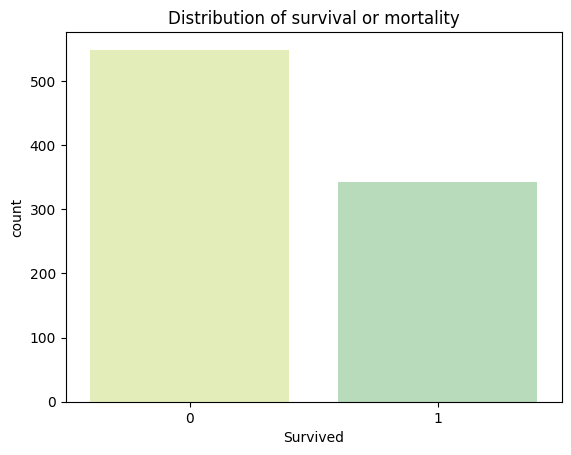

In [31]:
df_survived = df_train['Survived']

print(f'There were {df_survived.value_counts()[1]} survivors and {df_survived.value_counts()[0]} mortalities in the train set.')
print(f'Making the chance of survival {df_survived.value_counts()[1] / (df_survived.value_counts()[1] + df_survived.value_counts()[0]) * 100}%')

sns.countplot(x = df_survived)
plt.title('Distribution of survival or mortality')
plt.show()

## Ticket Class

Passangers were split into three Ticket Classes and hereby the placement on the ship deck:
There were 216 people on the upper deck.
There were 184 people on the middle deck.
There were 491 people on the lower deck


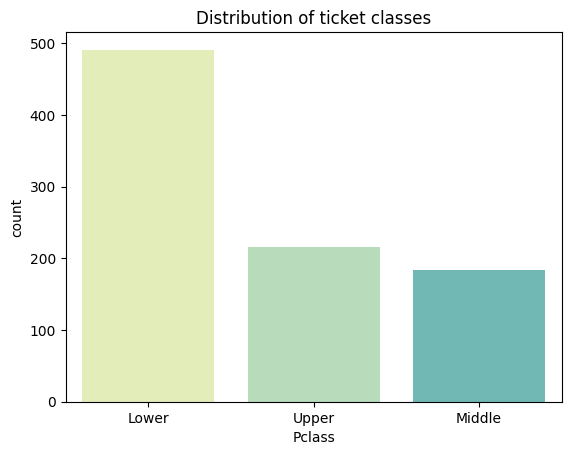

In [27]:
df_pclass = df_train['Pclass']

print('Passangers were split into three Ticket Classes and hereby the placement on the ship deck:')
print(f'There were {df_pclass.value_counts().sort_index()[2]} people on the upper deck.') 
print(f'There were {df_pclass.value_counts().sort_index()[1]} people on the middle deck.') 
print(f'There were {df_pclass.value_counts().sort_index()[0]} people on the lower deck')

sns.countplot(x = df_pclass)
plt.title('Distribution of ticket classes')
plt.show()

## Passenger sex

There were 577 males onboard.
There were 314 females onboard.


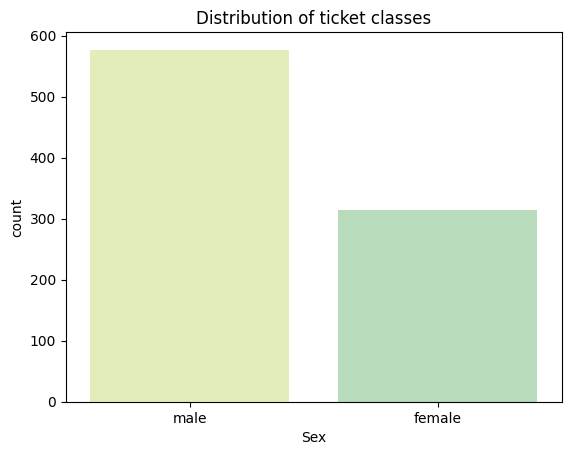

In [36]:
df_sex = df_train['Sex']
print(f'There were {df_sex.value_counts().sort_index()[1]} males onboard.') 
print(f'There were {df_sex.value_counts().sort_index()[0]} females onboard.') 

sns.countplot(x = df_sex)
plt.title('Distribution of ticket classes')
plt.show()

There were 278 passenges under the age of 25.
There were 436 passengers 25 years or older.
There were 11 passenges 65 years or older.


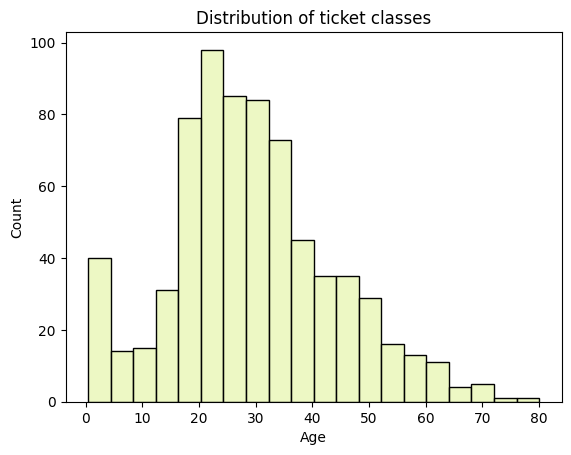

In [71]:
df_age = df_train['Age']
print(f'There were {np.count_nonzero(df_age < 25)} passenges under the age of 25.') 
print(f'There were {np.count_nonzero(df_age >= 25)} passengers 25 years or older.') 
print(f'There were {np.count_nonzero(df_age >= 65)} passenges 65 years or older.') 


sns.histplot(data = df_age)
plt.title('Distribution of ticket classes')
plt.show()

In [64]:
np.count_nonzero(df_age < 25)

278

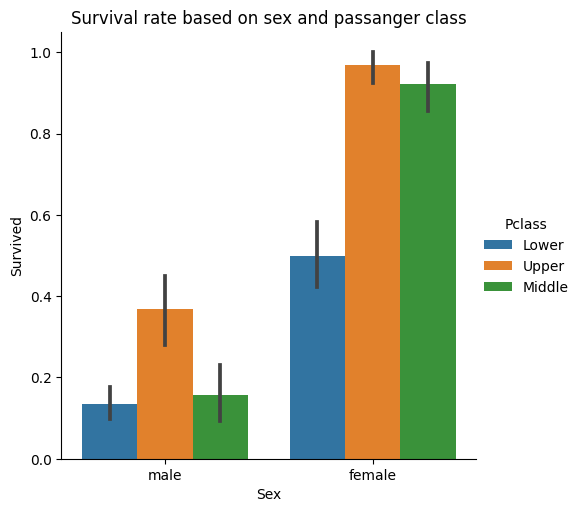

In [13]:
sns.catplot(data=df_train, x="Sex", y="Survived", hue="Pclass", kind="bar")
plt.title('Survival rate based on sex and passanger class')
plt.show()